# Importing the data and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,roc_auc_score,f1_score,roc_curve

data=pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Observing the data and checking out null values

In [4]:
data = data.drop(columns=['Id'])
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Encoding Categorical Variables.

In [7]:
print(data['Species'].value_counts())
mapping={
    'Iris-setosa':0,
    'Iris-versicolor':1,
    'Iris-virginica':2
}

data['Species']=data['Species'].map(mapping)


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


# Standardizing the Data

In [10]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

# Logistic Regression

In [12]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)


best_model = None
best_k = -1
best_acc=-1

k_values = [1,3,5,7,9,11,13]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_valid)
    acc=accuracy_score(y_valid,y_pred)
    if acc > best_acc:
        best_acc=acc
        best_k=k 
        best_model=knn

print(f"\nBest k: {best_k}")
print(f"Best Accuracy on validation: {best_acc:.3f}")



Best k: 1
Best Accuracy on validation: 0.967


In [14]:
y_pred=best_model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

print("\nConfusion Matrix:\n", cm)
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1 Score:  {f1:.3f}")
print(f"Accuracy Score:  {acc:.3f}")


Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]
Precision: 0.944
Recall:    0.933
F1 Score:  0.933
Accuracy Score:  0.933


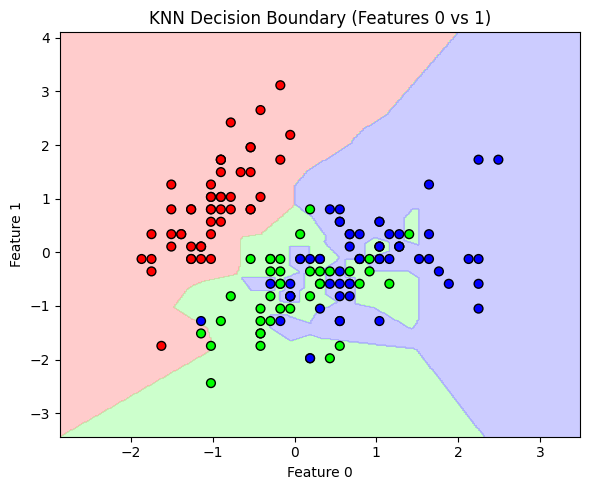

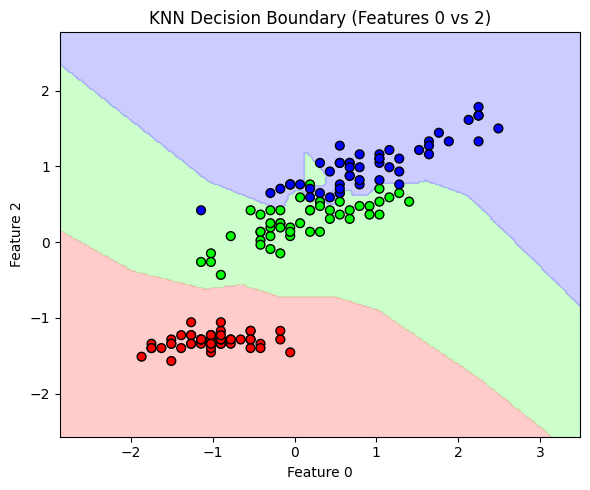

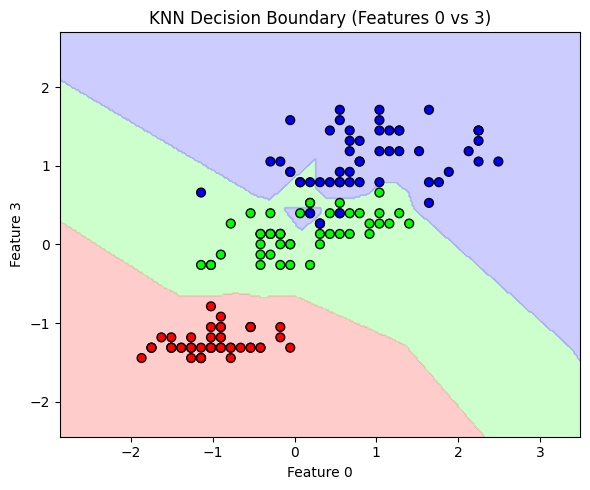

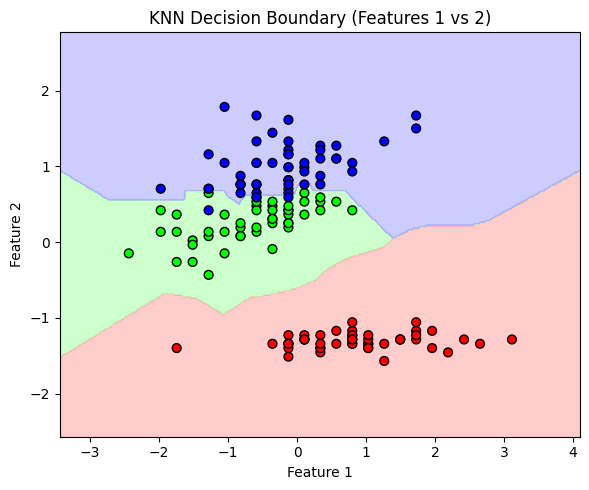

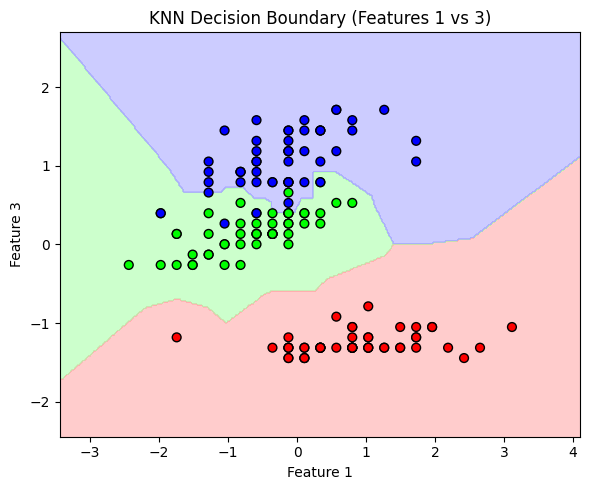

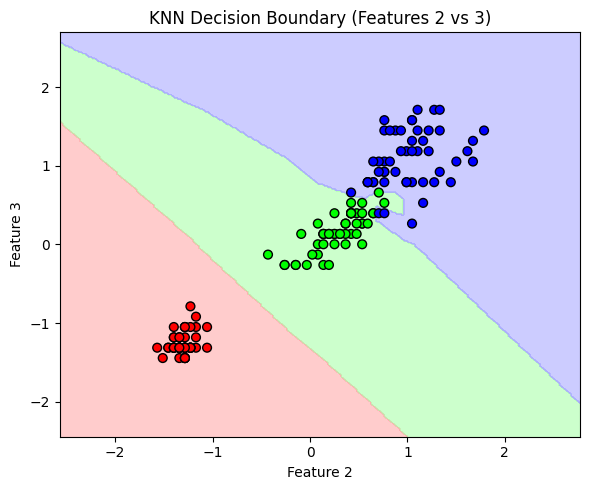

In [15]:
from matplotlib.colors import ListedColormap
from itertools import combinations

num_features = X_scaled.shape[1]
feature_pairs = list(combinations(range(num_features), 2))

cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

for i, (feat1, feat2) in enumerate(feature_pairs):
    X_pair = X_scaled[:, [feat1, feat2]]

    X_train_pair, X_temp_pair, y_train_pair, y_temp_pair = train_test_split(
        X_pair, y, test_size=0.4, stratify=y, random_state=42
    )
    X_valid_pair, X_test_pair, y_valid_pair, y_test_pair = train_test_split(
        X_temp_pair, y_temp_pair, test_size=0.5, stratify=y_temp_pair, random_state=42
    )

    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train_pair, y_train_pair)

    x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
    y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
    plt.scatter(X_pair[:, 0], X_pair[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=40)
    plt.xlabel(f"Feature {feat1}")
    plt.ylabel(f"Feature {feat2}")
    plt.title(f"KNN Decision Boundary (Features {feat1} vs {feat2})")
    plt.tight_layout()
    plt.show()
